# AML Homework 1 PART 1 The Housing Prices

# Question 1

###### Join the House Prices - Advanced Regression Techniques competition on Kaggle. Download the training and test data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import e, log
import csv
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from numpy.random import rand
df = pd.read_csv('train.csv')
trainDF = df

## Question 2

###### Give 3 examples of continuous and categorical features in the dataset; choose one feature of each type and plot the histogram to illustrate the distribution.

###### Categorical Features: MSZoning, SaleType, SaleCondition
###### Continuous Features: LotFrontage, MasVnrArea, GarageYrBlt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

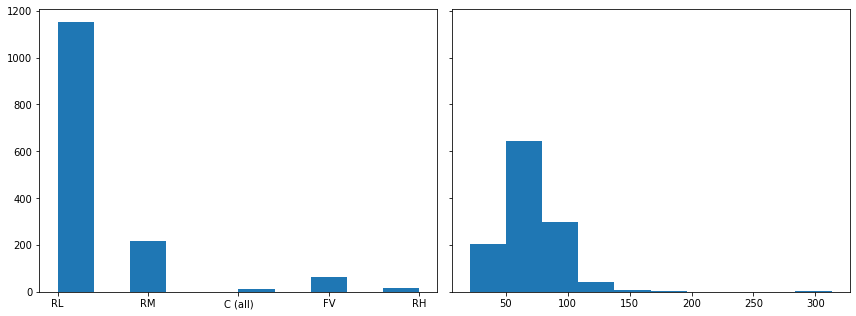

In [2]:
#Read df into a pandas dataframe
print(df.info())
#From the datatypes we can see:
#Categorical Features: MSZoning, SaleType, SaleCondition
#Continuous Features: LotFrontage, MasVnrArea, GarageYrBlt
fig, axs = plt.subplots(1,2,sharey=True,tight_layout=True)
fig.set_figheight(4.5), fig.set_figwidth(12)
#Plotting Categorical Features
axs[0].hist(df["MSZoning"])
#Plotting Continuous Features
axs[1].hist(df["LotFrontage"])

## Question 3

###### Pre-process your data, explain your pre-processing steps, and the reasons why you need them.

In [3]:
#Lets divide the data into 3 types:categorical, categorical_simple, and continuous
#categorical: non-ordinal categorical variables, they will be one-hot encoded
#categorical_ordinal: ordinal categorical variables, they will be label encoded
#continuous: continuous variables, these will be converted into float
categorical = {"MSZoning","LotShape","LotConfig",
           "Neighborhood","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st",
           "Exterior2nd","MasVnrType","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
           "BsmtFinType1","BsmtFinType2","Heating","Electrical",
           "GarageType","GarageFinish","GarageCond","PavedDrive","Fence","MiscFeature",
           "SaleType","SaleCondition"}
categorical_ordinal = {"Street","Alley","Utilities","LandSlope","LandContour","CentralAir","PoolQC",
            "Condition1","Condition2","ExterQual","KitchenQual","HeatingQC","Functional","GarageQual",
            "FireplaceQu"}
continuous = {"MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1",
             "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath",
             "BsmtHalfBath","FullBath","HalfBath","Bedroom","Kitchen","TotRmsAbvGrd","Fireplaces","GarageYrBlt",
             "GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
             "MiscVal","MoSold","YrSold","BedroomAbvGr","KitchenAbvGr","SalePrice"}


#Function to find unique categories within a categorical feature
def find_Category(column):
    categories = set()
    for value in column:
        categories.add(value)
    return categories

#Function to preprocess all the data in the dataset in one run
def preprocessing(df,start,end):
    #creating a list of dataframe columns
    columns = list(df)[start:end]
    #df_cleaned = pd.DataFrame() 
    data_cleaned = [] #Array that contains cleaned data
    for column in columns:
        tmp = []
        #Takes care of non-ordinal categorical features  
        if column in categorical:
            #print(column + " is categorical")
            cats = find_Category(trainDF[column])
            cats = list(cats)+["NA"]
            for value in df[column]:
                tmp2 = [0]*len(cats)
                if value != value:
                    tmp2[len(cats)-1] = 1
                else:
                    tmp2[cats.index(value)]=1
                tmp.append(tmp2)
        #Takes care of ordinal categorical features    
        elif column in categorical_ordinal:
            #print(column + " is categorical_ordinal")
            cats = find_Category(trainDF[column])
            cats = list(cats)+["NA"]
            for value in df[column]:
                if value != value:
                    tmp.append(len(cats)-1)
                else:
                    tmp.append(cats.index(value))
                
        #Normalizes numerical value
        elif column in continuous:
            #print(column + ' is continuous')
            for value in df[column]:
                #convert each value into float and replace any missing value with 0
                tmp.append(float(value) if value == value else 0)
        tmp = np.array(tmp)
        if tmp.ndim == 1:
            tmp = tmp.reshape(-1,1)
            
        if data_cleaned == []:
            data_cleaned = tmp
        else:
            data_cleaned = np.hstack((data_cleaned, tmp))#Append the cleaned column to new dataframe
    return data_cleaned

data = preprocessing(df,1,-1)


/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


## Question 4

###### One-hot encoding

##### Question 4 is already answered in Question 3 as the pre-processing function one-hot encoded all the non-ordinal categorical value
##### I one-hot encoded all of the non-ordinal categorical value to see how well the model performance without using any packages



## Question 5

##### Using ordinary least squares (OLS), try to predict house prices on this dataset. Choose the features (or combinations of features) you would like to use or ignore, provided you justify your choice. Evaluate your predictions on the training set using the MSE and the R2 score. For this question, you need to implement OLS from scratch without using any external libraries or packages.

In [4]:
class OLS:
    def __init__(self, x, y, learning_rate, iteration):
        self.x = x
        self.y = y
        self.lr = learning_rate
        self.iteration = iteration
        self.theta = (1/(x.shape[1]+1))*np.ones((x.shape[1]+1,1))#Mean Initialization
        
    def fit(self):
        x = np.hstack([np.ones(len(self.x))[:, np.newaxis], self.x])#Account for y-intersection
        n = self.y.shape[0]
        theta = self.theta
        cost_list = []
        for i in range(iteration):
            y_pred = np.dot(x, theta)
            #Calculating cost using the cost function
            cost = (1/(2*n))*np.sum(np.square(y_pred - y))
            #gradient decent
            d_theta = (1/n)*np.dot(x.T, y_pred - y)
            theta = theta - self.lr*d_theta
            cost_list.append(cost)
#             print('Prediction: ' + str(y_pred))
#             print('Cost:' + str(cost))
#             print('d_theta' + str(d_theta))
        
        self.theta = theta
        self.y_pred = np.dot(x, theta)
        
        plt.plot(cost_list)
        plt.title("Cost Grpah")
        plt.show()
        
        return theta, cost_list, self.y_pred
    
    def predict(self,data):
        x = np.hstack([np.ones(len(data))[:, np.newaxis], data])
        y_pred = np.dot(x, theta)
        return y_pred
        
    def evaluate(self):
        r2 = r2_score(self.y, self.y_pred)
        mse = mean_squared_error(self.y, self.y_pred)
        print("R2_Score: ", r2)
        print("Mean Squared Error: ",mse)

## Question 6

##### Train your classifier using all of the training data, and test it using the testing data. Submit your results to Kaggle.

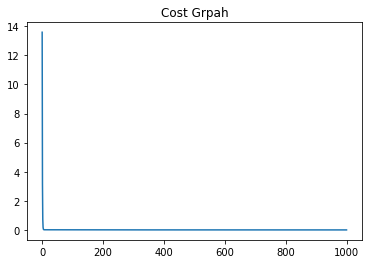

R2_Score:  0.8274347137752431
Mean Squared Error:  0.00518983329947234


In [5]:
iteration = 1000
learning_rate = 5E-1
y = preprocessing(df,-1,9999)

data = normalize(data,axis=0)
# y = normalize(y,axis=0)
y = np.log10(y)

model_OLS = OLS(data,y,learning_rate, iteration)
theta, cost_list, y_pred = model_OLS.fit()
OLS.evaluate(model_OLS)
#np.log1p()

In [6]:
test_df = pd.read_csv('test.csv')

test_data = preprocessing(test_df,1,80)
test_data = normalize(test_data,axis=0)
predictions = model_OLS.predict(test_data)


with open("submission.csv","w") as f:
    writer = csv.writer(f)
    row = ["Id", "SalePrice"]
    writer.writerow(row)
    for i in range(len(predictions)):
        row = [i+1461, 10**predictions[i][0]]
        writer.writerow(row)
        


/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
